In [3]:
import COFE.analyse
import COFE.scpca
import COFE.plot
import numpy as np
import anndata as ad
import pandas as pd
import custom_func as pca
import matplotlib.pyplot as mp

### Step 1: Importing the Dataset

In [4]:
#Open dataset

path = '/Users/maksimsgolubovics/Studienprojekt/Studienprojekt/Study Project/mouse_liver'
adata = ad.read_h5ad(path)


In [5]:
adata

AnnData object with n_obs × n_vars = 1096 × 40614
    obs: 'study', 'time', 'outlier', 'Sex', 'Light', 'Age (weeks)', 'Sequencing Type', 'Inferred Sequencing Type', 'Note'
    var: 'Symbol'
    obsm: 'centered_study_log_small', 'small_reduction'
    layers: 'centered_study_log_full', 'centered_study_log_full_pydeseq2', 'deseq2_norm', 'log_trasformed', 'log_trasformed_deseq2', 'not_normalized'

In [6]:
#Open dataset

path = '/Users/maksimsgolubovics/Studienprojekt/Studienprojekt/Study Project/mouse_liver'
adata = ad.read_h5ad(path)

#Without batch effects
df = adata.obsm['centered_study_log_small']
#With batch effects
log_batcheffect = adata.layers['log_trasformed']
df_log_batcheffect = pd.DataFrame(data=log_batcheffect, columns=adata.var.index, index=adata.obs.index)

### Step 2: Prepare the dataset

In [7]:
#Subset the dataset WITHOUT batcheffect for 5 studies with ca. 100 samples
study = adata.obs[adata.obs['study'].isin(['Abe22', 'Acosta-Rodríguez22A', 'Acosta-Rodríguez22B', 'Astafev23','Yang16A'])]['study']
X_train_samll_0 =df.loc[study.index]

#Substract X_test data to generate X_train
X_train_big_0 = df.drop(index=X_train_samll_0.index)

In [27]:
#Subset the dataset WITH batcheffect for 5 studies with ca. 100 samples
study = adata.obs[adata.obs['study'].isin(['Abe22', 'Acosta-Rodríguez22A', 'Acosta-Rodríguez22B', 'Astafev23','Yang16A'])]['study']
X_test_small_1 = df_log_batcheffect.loc[study.index]

#Substract X_test data to generate X_train
X_train_big_1 = df_log_batcheffect.drop(index=X_test_small_1.index)

In [9]:
true_time_train = adata.obs['time'].drop(index=X_train_samll_0.index)
true_time_test =adata.obs['time'].loc[study.index]

### Step 3: Apply preprocess

In [10]:
#No batch-effect
X_train_big_0, X_train_samll_0, features_, features_std_ = COFE.analyse.preprocess_data(X_train_big_0.to_numpy(), X_train_samll_0.to_numpy(), 
                                                                           features=X_train_big_0.columns, feature_dim='col',
                                                                           mean_threshold= 0,
                                                                           scaling_threshold=7.3)
X_train_big_0.shape

(995, 6103)

In [28]:
#With batch-effect
X_train_big_1, X_test_small_1, features_, features_std_ = COFE.analyse.preprocess_data(X_train_big_1.to_numpy(), X_test_small_1.to_numpy(), 
                                                                           features=X_train_big_1.columns, feature_dim='col',
                                                                           mean_threshold= 0,
                                                                           scaling_threshold=7.3)
X_train_big_1.shape

(995, 10585)

### Step 4: Cross validation

### Step 5: Predict and plot

#### 101 samples

In [12]:
s_choices = np.linspace(1, 40, 15)
cv_small_0 = COFE.analyse.cross_validate(X_train_samll_0, s_choices, features=features_, K=5, ncores=-1)

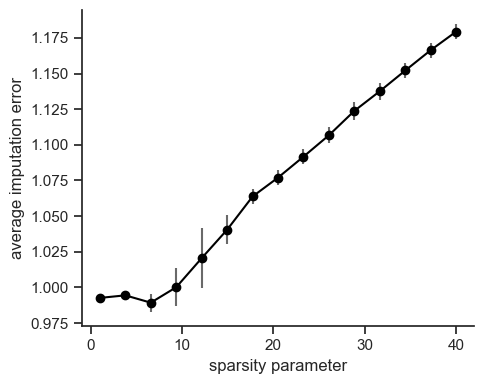

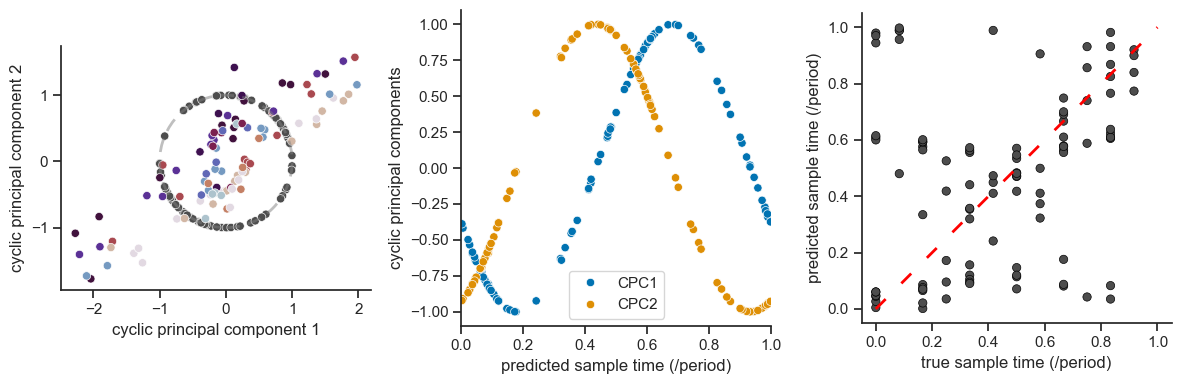

In [13]:
train_results_mouse_small_0 = COFE.analyse.predict_time(X_train_samll_0, cv_small_0, true_times=true_time_test.to_numpy())
COFE.plot.plot_cv_run(train_results_mouse_small_0, figsize=(5,4))
COFE.plot.plot_circular_ordering(train_results_mouse_small_0, time=true_time_test.to_numpy(), X=X_train_samll_0, figsize=(12, 4))

In [15]:
train_results_mouse_small_0['MAPE']*24

2.667010933556581

#### 995 Samples

In [16]:
s_choices = np.linspace(1, 40, 15)
cv_big_0 = COFE.analyse.cross_validate(X_train_big_0, s_choices, features=features_, K=5, ncores=-1)

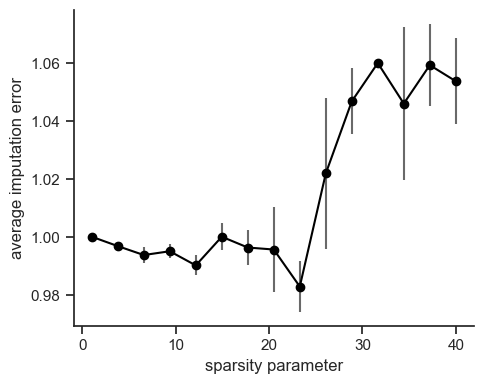

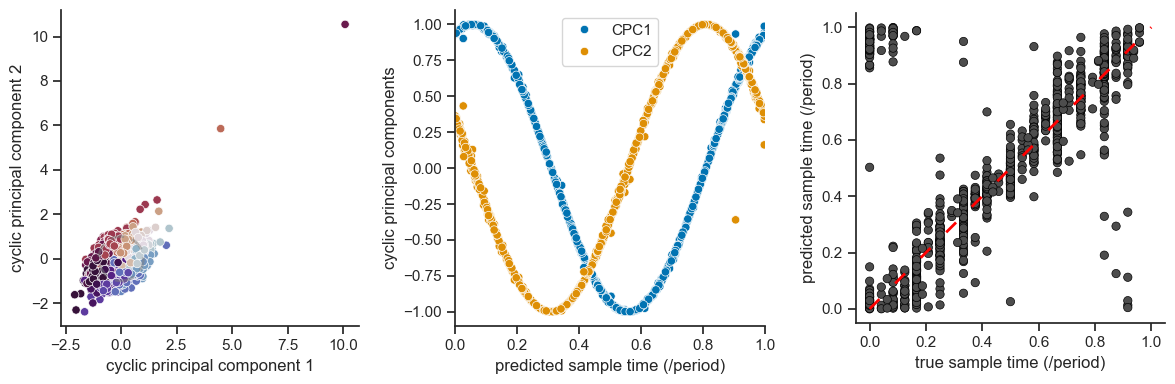

In [17]:
train_results_mouse_big_0 = COFE.analyse.predict_time(X_train_big_0, cv_big_0, true_times=true_time_train.to_numpy())
COFE.plot.plot_cv_run(train_results_mouse_big_0, figsize=(5,4))
COFE.plot.plot_circular_ordering(train_results_mouse_big_0, time=true_time_train.to_numpy(), X=X_train_big_0, figsize=(12, 4))

In [18]:
train_results_mouse_big_0['MAPE']*24

1.0962646281349002

#### 995 Samples with batch effect

In [20]:
s_choices = np.linspace(1, 40, 15)
cv_big_1 = COFE.analyse.cross_validate(X_train_big_1, s_choices, features=features_, K=5, ncores=-1)

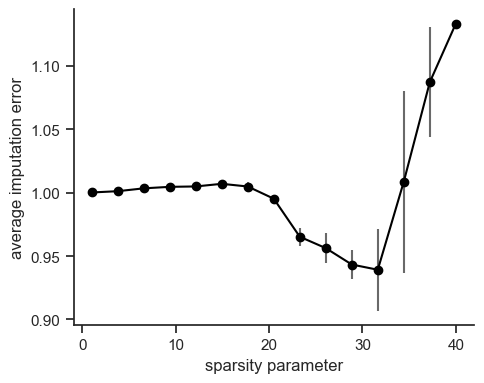

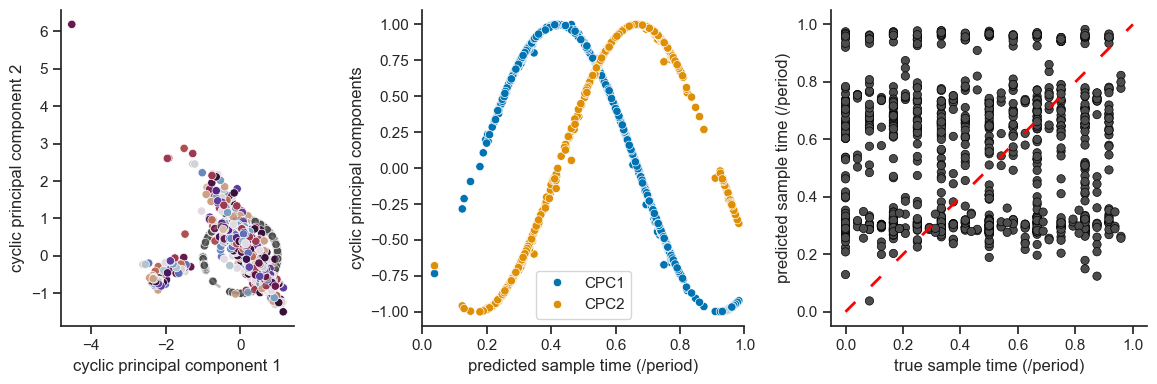

In [23]:
train_results_mouse_big_1 = COFE.analyse.predict_time(X_train_big_1, cv_big_1, true_times=true_time_train.to_numpy())
COFE.plot.plot_cv_run(train_results_mouse_big_1, figsize=(5,4))
COFE.plot.plot_circular_ordering(train_results_mouse_big_1, time=true_time_train.to_numpy(), X=X_train_big_1, figsize=(12, 4))

In [24]:
train_results_mouse_big_1['MAPE']*24

5.573528880648631